# <center><font color=green> <b><i>Predict a house price in King County</i></b></font></center>

<font color=grey><b>This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The goal of this project is to find a model for evaluating and predicting a price of a house based on some key characteristics. </b></font>

<font color=grey><b>id</b> :a notation for a house</font>

<font color=grey><b> date</b>: Date house was sold</font>

<font color=grey><b>price</b>: Price is prediction target</font>

<font color=grey><b>bedrooms</b>: Number of Bedrooms/House</font>

<font color=grey><b>bathrooms</b>: Number of bathrooms/bedrooms</font>

<font color=grey><b>sqft_living</b>: square footage of the home</font>

<font color=grey><b>sqft_lot</b>: square footage of the lot</font>

<font color=grey><b>floors</b> :Total floors (levels) in house</font>

<font color=grey><b>waterfront</b> :House which has a view to a waterfront</font>

<font color=grey><b>view</b>: Has been viewed</font>

<font color=grey><b>condition</b> :How good the condition is  Overall</font>

<font color=grey><b>grade</b>: overall grade given to the housing unit, based on King County grading system</font>

<font color=grey><b>sqft_above</b> :square footage of house apart from basement</font>

<font color=grey><b>sqft_basement</b>: square footage of the basement</font>

<font color=grey><b>yr_built</b> :Built Year</font>

<font color=grey><b>yr_renovated</b> :Year when house was renovated</font>

<font color=grey><b>zipcode</b>:zip code</font>

<font color=grey><b>lat</b>: Latitude coordinate</font>

<font color=grey><b>long</b>: Longitude coordinate</font>

<font color=grey><b>sqft_living15</b> :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area</font>

<font color=grey><b>sqft_lot15</b> :lotSize area in 2015(implies-- some renovations)</font>

## <b>1. Download data and import libraries:</b>

### 1.1. First we import all necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from scipy import stats
%matplotlib inline

### 1.2. Load the data into a Pandas DataFrame:

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df_houses=pd.read_csv(file_name)
print('The file is loaded!')

The file is loaded!


## <b>2. Exploring and preparing the data set:</b>

### 2.1 Look at the first ten rows of the DataFrame

In [6]:
# df_houses['sqm_living'] = df_houses['sqft_living']*0.09290304
df_houses.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqm_living
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,109.625587
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,238.760813
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,71.535341
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,182.089958
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,156.077107
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,503.534477
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,159.328714
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,98.477222
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,165.367411
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,175.586746


### 2.2. Lets see some summary statistics of numerical columns

In [4]:
df_houses.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 2.3. List of columns in the dataset

In [4]:
df_houses.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<font color=grey>There are few columns which are unnecessary: 'id', 'Unnamed: 0' and 'zipcode'. We will drop it from our dataset</font>

In [6]:
df_houses.drop("id", axis = 1, inplace=True)
df_houses.drop("Unnamed: 0", axis = 1, inplace=True)
df_houses.drop("zipcode", axis = 1, inplace=True)

### 2.4. Explore type of each column

In [7]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21600 non-null float64
bathrooms        21603 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(12), object(1)
memory usage: 3.1+ MB


<font color=grey>The column 'date' is type 'object' which is unappropriate. We will change it to 'datetime'</font>

In [8]:
df_houses['date'] =  pd.to_datetime(df_houses['date'], infer_datetime_format=True)
print('Change of type to datetime is succesfull!')

Change of type to datetime is succesfull!


### 2.5. Lets see if we have columns with Null values

In [9]:
df_houses.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

<font color=grey>We have two columns with null values: 'bedrooms' and 'bathrooms'. We will replace null values with the mean of each of them. </font>

In [10]:
mean=df_houses['bathrooms'].mean()
df_houses['bathrooms'].replace(np.nan,mean, inplace=True)
print('Null values of bathrooms: ',df_houses['bathrooms'].isnull().sum())

Null values of bathrooms:  0


In [11]:
mean=df_houses['bedrooms'].mean()
df_houses['bedrooms'].replace(np.nan,mean, inplace=True)
print('Null values of bedrooms: ', df_houses['bedrooms'].isnull().sum())

Null values of bedrooms:  0


### 2.6. Explore distribution by each value of particular column

In [12]:
df_houses['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

### 2.7. Examine the correlation between all columns and price

In [13]:
df_houses.corr()['price'].sort_values()

long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [15]:
#we can replace df_houses['sqft_living'] with any column in the dataset
pearson_coef, p_value = stats.pearsonr(df_houses['sqft_living'], df_houses['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7020350546118  with a P-value of P = 0.0


## <b>3. Choose a model for price predicting</b>

### 3.1. Linear Regression

In [20]:
features = ['sqft_living']


In [21]:
print('Fit model and coefficient of determination')
X = df_houses[features]
Y = df_houses['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

Fit model and coefficient of determination


0.49285321790379316

In [22]:
print('Slope: ', lm.coef_)
print('Intercept: ',lm.intercept_)

Slope:  [280.6235679]
Intercept:  -43580.743094473844


<font color=grey>Lets see plot of real data for price and that model predicts</font>

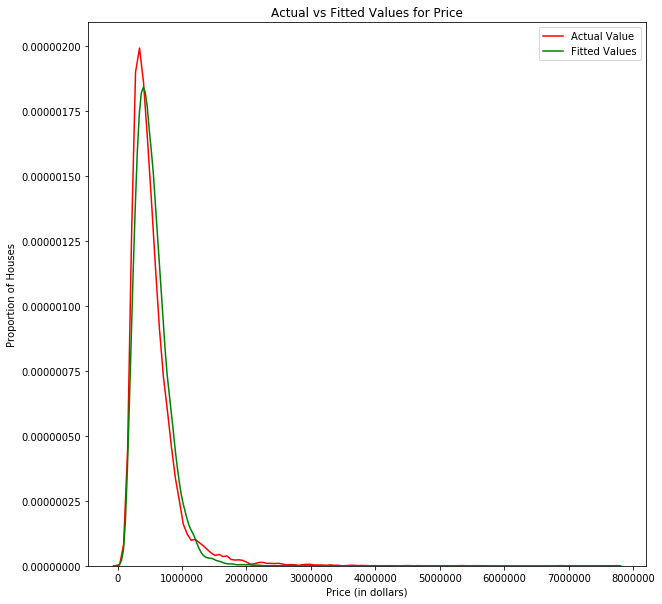

In [23]:
width = 10
height = 10
Yhat=lm.predict(X)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_houses['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="g", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()